<a href="https://colab.research.google.com/github/Akshita0501/OIBSIP/blob/main/Email_Spam_Detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:

# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
import zipfile
import os

# Path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/sms_spam.zip'

# Directory to extract the files
extracted_path = '/content/car_price_dataset'

# Create the directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [ ]:
# Load the dataset from the extracted path
csv_path = os.path.join(extracted_path, 'spam.csv')
df = pd.read_csv(csv_path, encoding='latin-1')

In [ ]:
# Display the first few rows of the dataset
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
# Drop unnecessary columns with NaN values
df = df[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['Category', 'Message']


In [ ]:

# Data Preprocessing
X = df['Message']
y = df['Category'].map({'ham': 0, 'spam': 1})


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:

# Train a Naive Bayes classifier
spam_classifier = MultinomialNB()
spam_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = spam_classifier.predict(X_test_vectorized)



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



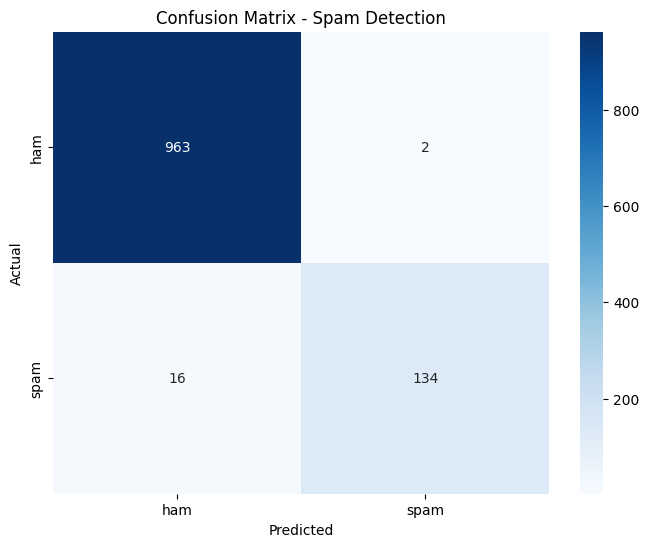

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - Spam Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


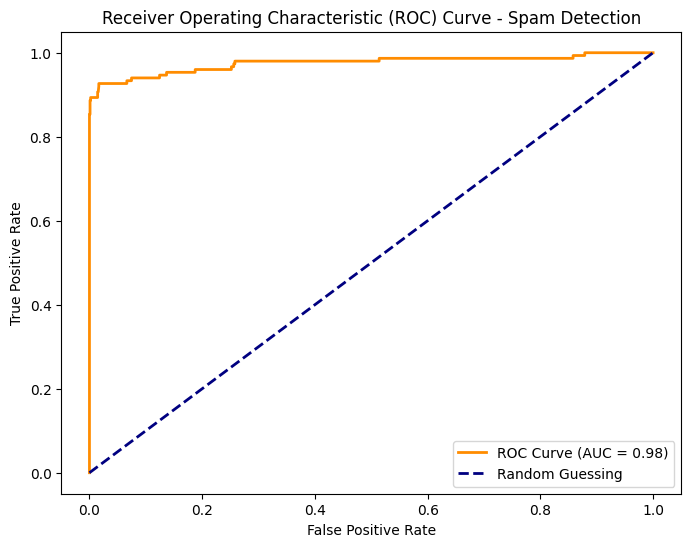

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC for the testing set
fpr, tpr, thresholds = roc_curve(y_test, spam_classifier.predict_proba(X_test_vectorized)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Spam Detection')
plt.legend(loc='lower right')
plt.show()


In [ ]:
def predict_spam_or_ham(model, vectorizer, message):
    # Preprocess the input message
    message_vectorized = vectorizer.transform([message])

    # Make the prediction
    prediction = model.predict(message_vectorized)[0]

    # Map the numeric prediction back to 'ham' or 'spam'
    label = 'ham' if prediction == 0 else 'spam'

    return label

# Example usage:
example_message = "Congratulations! You've won a free iPhone. Claim it now!"

predicted_label = predict_spam_or_ham(spam_classifier, vectorizer, example_message)
print(f'The message is predicted as: {predicted_label}')


The message is predicted as: spam


In [ ]:
def predict_spam_or_ham(model, vectorizer, message):
    # Preprocess the input message
    message_vectorized = vectorizer.transform([message])

    # Make the prediction
    prediction = model.predict(message_vectorized)[0]

    # Map the numeric prediction back to 'ham' or 'spam'
    label = 'ham' if prediction == 0 else 'spam'

    return label

# Example usage:
example_message = "Ok lar... Joking wif u oni..."

predicted_label = predict_spam_or_ham(spam_classifier, vectorizer, example_message)
print(f'The message is predicted as: {predicted_label}')


The message is predicted as: ham
